# Yongjie's CA1-Classification Model

Name: Li Yongjie

ID: 2342377

Class: DAAA/FT/1B/01

# Background:
This is a dataset collected from an environmental company. The dataset contains
various information on water from different sources. From the perspective of quality
control, the company wants to build a machine learning model to predict water quality
based on the water properties.

# Objective
Use a classification learning model to predict water quality 

# References:

Srivastava, T. (2023) Tuning the parameters of your random forest model, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ (Accessed: 26 November 2023). 

Relationship between dissolved solids and conductivity:<br>
LO;, T.M.H. (no date) Relationship between total dissolved solids and electrical conductivity in Marcellus hydraulic fracturing fluids, Water science and technology : a journal of the International Association on Water Pollution Research. Available at: https://pubmed.ncbi.nlm.nih.gov/29722685/ (Accessed: 03 December 2023). 

0.  Data preperation

In [1123]:
# Importing the necessarty modules
import pandas as pd # Handles DataFrame
import matplotlib.pyplot as plt #Plot Graphs
from scipy.stats import norm
import seaborn as sns # Plotting Graphs
sns.set_theme(palette='pastel')

import numpy as np

# import func that allows us to do test-split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.linear_model import Ridge, Lasso

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC


# import func to perform model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,RocCurveDisplay
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    StratifiedKFold,
)


In [1124]:
#Loading the data for Classification and analysing it
df= pd.read_csv('./CA1-Classification-Dataset.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<hr></hr>

# Exploratory Data Analysis
<hr></hr>
Now, we will beegin our exploratory data analysis, with the aim to gain a better understanding on the water properties and how they affect the water quality.

Firstly, we would have to gain a brief understanding on the 9 different water properties and the tagert 'quality':

<ul>
    <li><strong>pH:</strong>
        <p>Measure of acidity/alkalinity in water. Scales from 0 to 14, from very acidic to very alkaline with 7 being neutral.</p>
    </li>
    <li><strong>Hardness:</strong>
        <p>Indicates the concentration of minerals in the water.</p>
    </li>
    <li><strong>Solids:</strong>
        <p>Refers to the total amount of solids dissolved and suspended particles.</p>
    </li>
    <li><strong>Chloramines:</strong>
        <p>Refers to the amount of chlorine compounds in water.</p>
    </li>
    <li><strong>Sulfate:</strong>
        <p>Refers to the amount of sulfate ions in water.</p>
    </li>
    <li><strong>Conductivity:</strong>
        <p>Refers to the conductivity of water.</p>
    </li>
    <li><strong>Organic Carbon:</strong>
        <p>Proportion of organic carbon in water.</p>
    </li>
    <li><strong>Trihalomethanes:</strong>
        <p>Measure of chemical compounds formed from the reaction of organic/inorganic materials with chlorine.</p>
    </li>
    <li><strong>Clarity:</strong>
        <p>Measure of transparency of water.</p>
    </li>
    <li><strong>Quality:</strong>
        <p>Represents an overall measure of water quality based on the water properties. Label indicates acceptable quality, 1 means potable and 0 means non-potable.</p>
    </li>
</ul>


    

### **Exploring Dataset**

In order to prevent our data set from being affected when exploring the dataset, we will create a copy of the original dataset

In [1125]:
df_explore = df.copy()

### <b>Getting descriptive information</b>

In [1126]:
df_explore.shape

(3276, 10)

In [1127]:
df_explore.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

In [1128]:
# Finding the percantage of missing values in each column
df_explore.isna().sum()/df_explore.count()

ph                 0.176302
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.313026
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.052023
Clarity            0.000000
Quality            0.000000
dtype: float64

In [1129]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Based on the information we collected, we can observe that the dataset we are working with contains 3276 rows and 10 columns (9 features + 1 target).

We can tell that all the datatype are numeric and that we have no categorical data that we need to handle. However, there are missing values for 3 of the columns which has to be handled with later on. Columns that have missing data includes, ph - 17.6%, Sulfate - 31.3% and Trihalomethanes - 5.2%

### <b>Target information

Since all the data are numeric, there are no unique values that we need to handle. Now we will work towards understanding our target viarable

In [1130]:
df_explore['Quality'].unique()

array([0, 1], dtype=int64)

We can take note that our target is a binary value of 0 or 1.

Since we are not able to assume what the value of 0 and 1 represents, therefore the goal of our model will be able to best predict the value of 0 and 1 as accurately as possbile rather than predicting one value better.

<p>By creating a simple bar chart we are able to see the distribution of the quality in our dataset.</p>

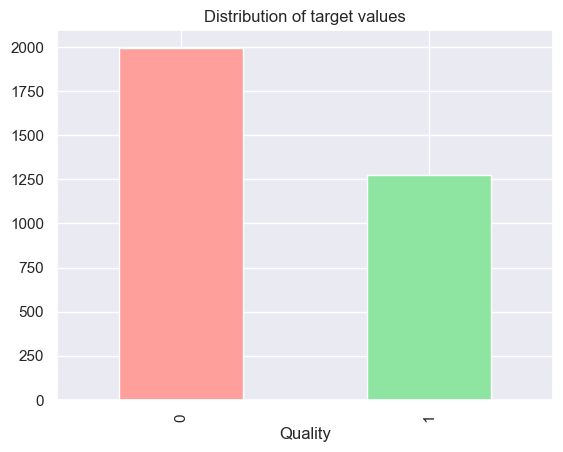

In [1131]:
bar_values = df_explore['Quality'].value_counts()
bar_values.plot(kind="bar", title="Distribution of target values", color = ['r', 'g'])
plt.show()

We can tell that there is about 1.5 times more Quality 0 water compared to Quality 1 water, which although is quite similar, it could be distributed more equally.

## Univariative Analysis
Analysing our feature one at a time, to gain a better understanding of the feature and its distribution.

<u>KDE Plot</u><br>
To observe the distribution of the features

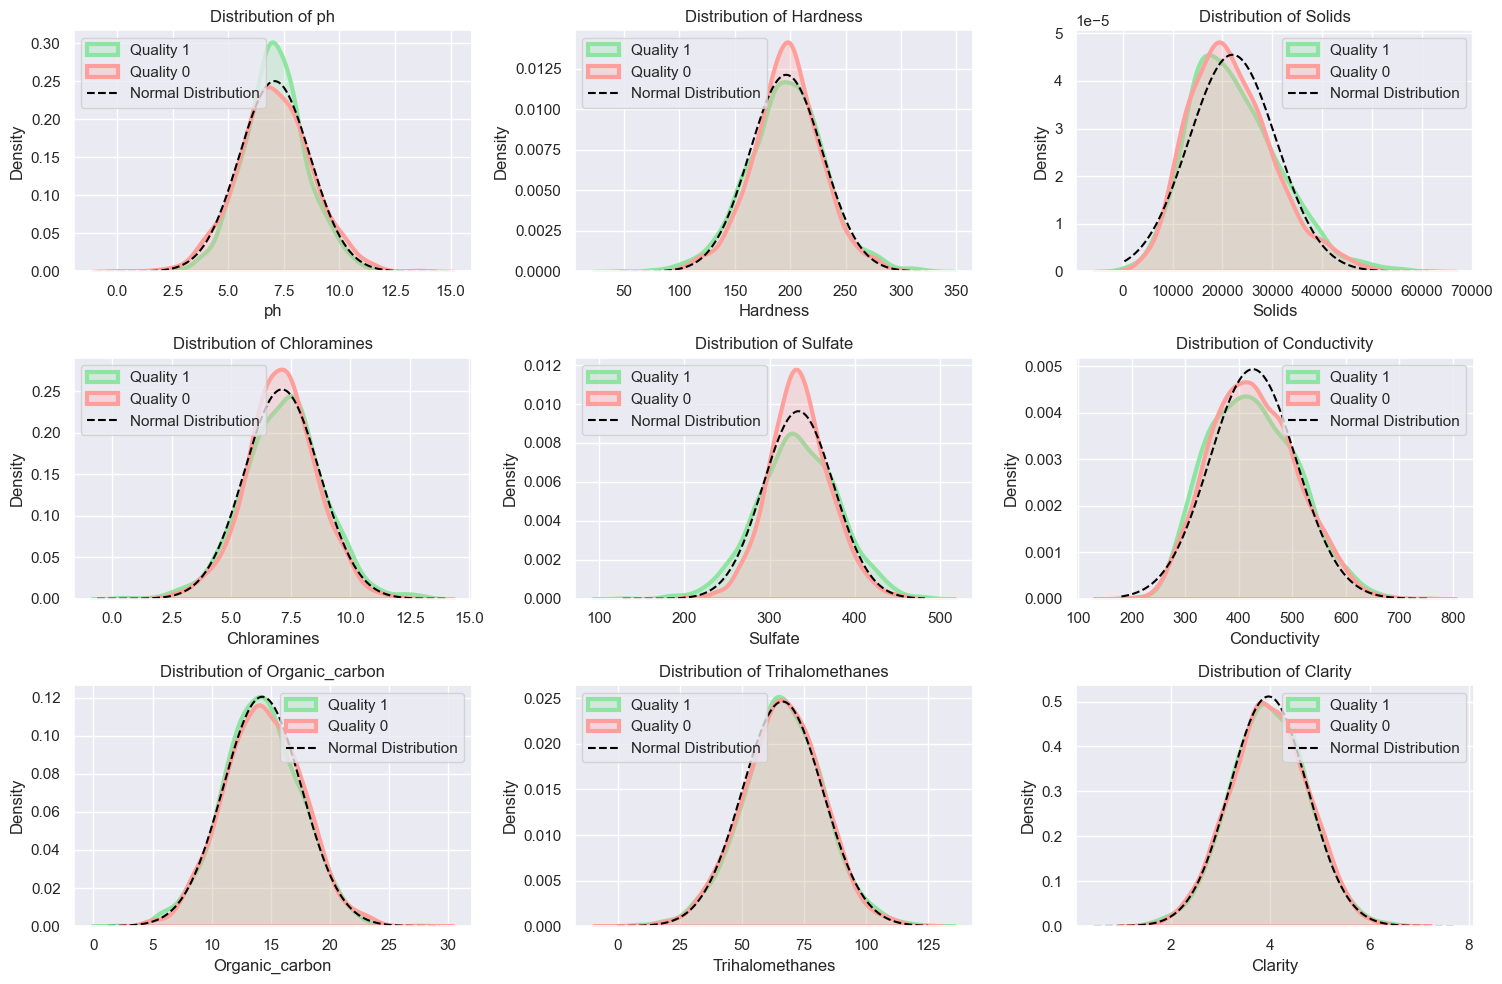

In [1132]:
def kde_plot(features, df):
    num_features = len(features)
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)

        # KDE plot for Quality = 1
        sns.kdeplot(
            df[df["Quality"] == 1][feature],
            lw=3, color="g", ax=axes[row, col], label='Quality 1', fill=True
        )

        # KDE plot for Quality = 0
        sns.kdeplot(
            df[df["Quality"] == 0][feature],
            lw=3, color="r", ax=axes[row, col], label='Quality 0', fill=True
        )

        # Normal distribution plot
        x_values = np.linspace(df[feature].min() - 1, df[feature].max() + 1, 1000)
        pdf_values = norm.pdf(x_values, loc=df[feature].mean(), scale=df[feature].std())
        axes[row, col].plot(x_values, pdf_values, label='Normal Distribution', color="black", linestyle='--')

        axes[row, col].legend()
        axes[row, col].set_title(f"Distribution of {feature}")
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

kde_plot(["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"], df)


**Summary for feature's and it's graph**
<ol>
    <li>For the featurese "ph," "Hardness," "Chloramines," "Conductivity," "Organic_carbon," "Trihalomethanes," and "Clarity" they are similar in showing a normal distribution for both quality 0 and 1. We can observe that the graphs for both quality are almost matching, suggesting that for most value of the feature it could be either quality 0 or 1.</li>
    <li>"Sulfate" shows a small difference of 0.004 in density at the median between Quality 0 and Quality 1.</li>
    <li>"Solids" seems to have a right-skewed distribution, suggesting potential outliers.</li>
</ol>
<hr>



<u>Box Plot</u><br>
To observe outliers

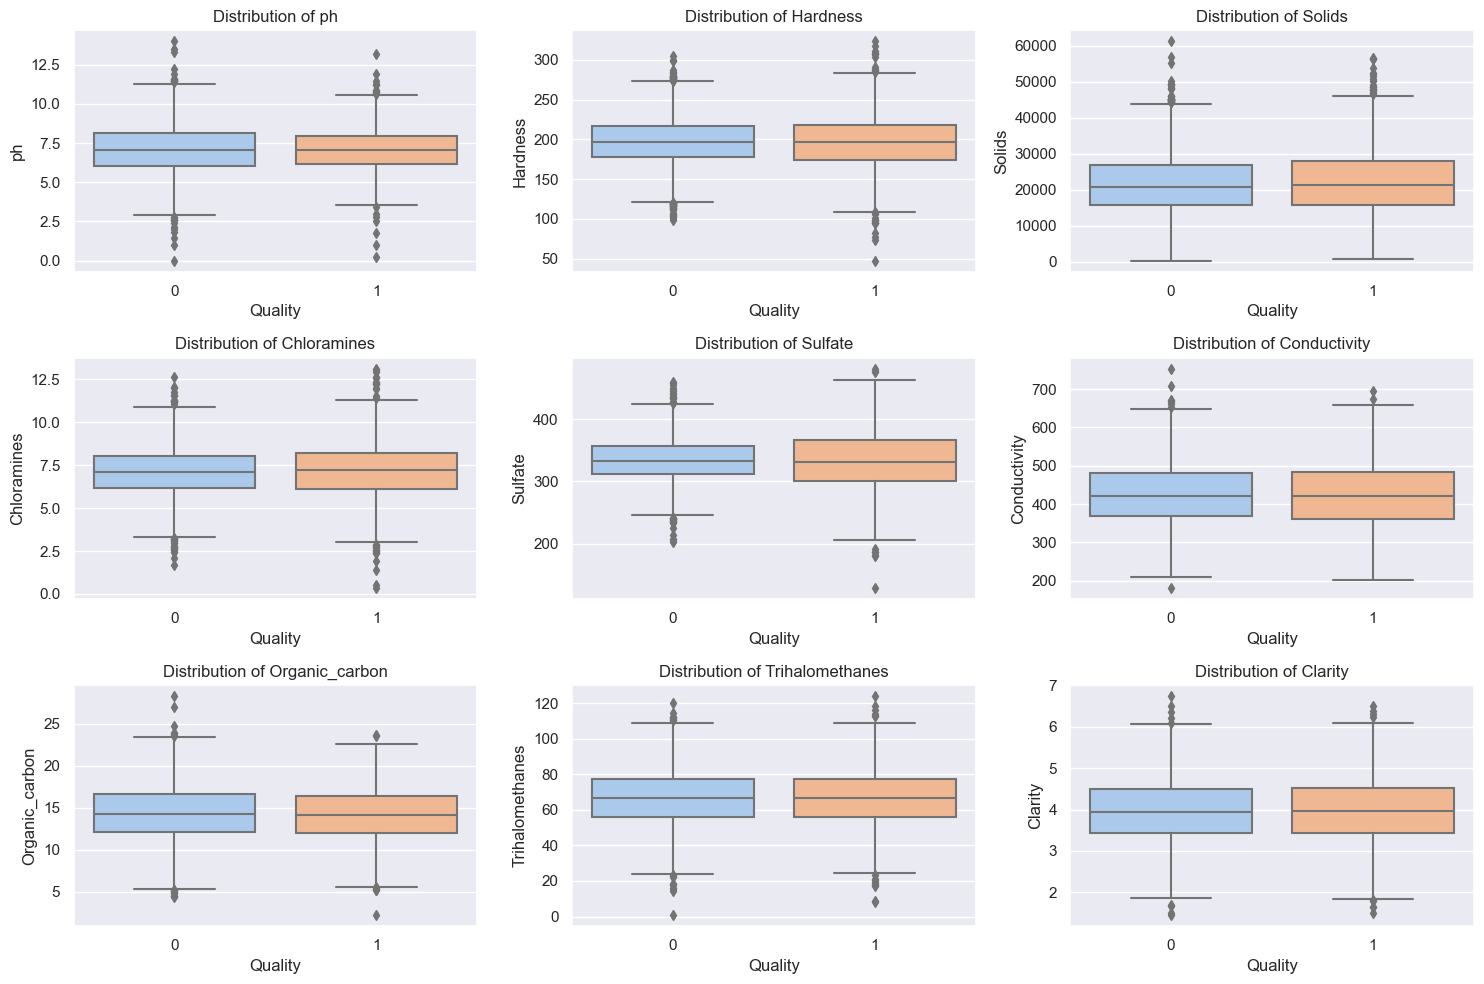

In [1133]:
def box_plot(features, df):
    num_features = len(features)
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)

        sns.boxplot(x =df['Quality'], y = df[feature], ax=axes[row,col])
        axes[row, col].set_title(f"Distribution of {feature}")

    plt.tight_layout()
    plt.show()

box_plot(["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"], df_explore)

In [1134]:
import numpy as np
import pandas as pd

def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Getting count of outliers
outliers_count = identify_outliers_iqr(df_explore).sum()
print("Number of outliers in the entire dataset:", outliers_count, sep='\n')

# Removing outliers
remove_outliers = df_explore[~identify_outliers_iqr(df_explore).any(axis=1)]
print(((df_explore.shape[0]-remove_outliers.shape[0])/df_explore.shape[0])*100)


Number of outliers in the entire dataset:
ph                 46
Hardness           83
Solids             47
Chloramines        61
Sulfate            41
Conductivity       11
Organic_carbon     25
Trihalomethanes    33
Clarity            19
Quality             0
dtype: int64
9.920634920634921


<u>Observation</u><br>
We can see that there are outliers for every feature in our dataset with almost 10% of rows having outliers, it is important to consider how to deal with it, as removing 10% of dateset could be a crucial mistake as those outliers could represent a new trend and we would also have less datepoints to train our model on.
<hr>


## Bivariative Analysis<br>
Looking for correlations between features and their relationship

<u>Heatmap</u><br>
Plotting heatmap to see correlation between features


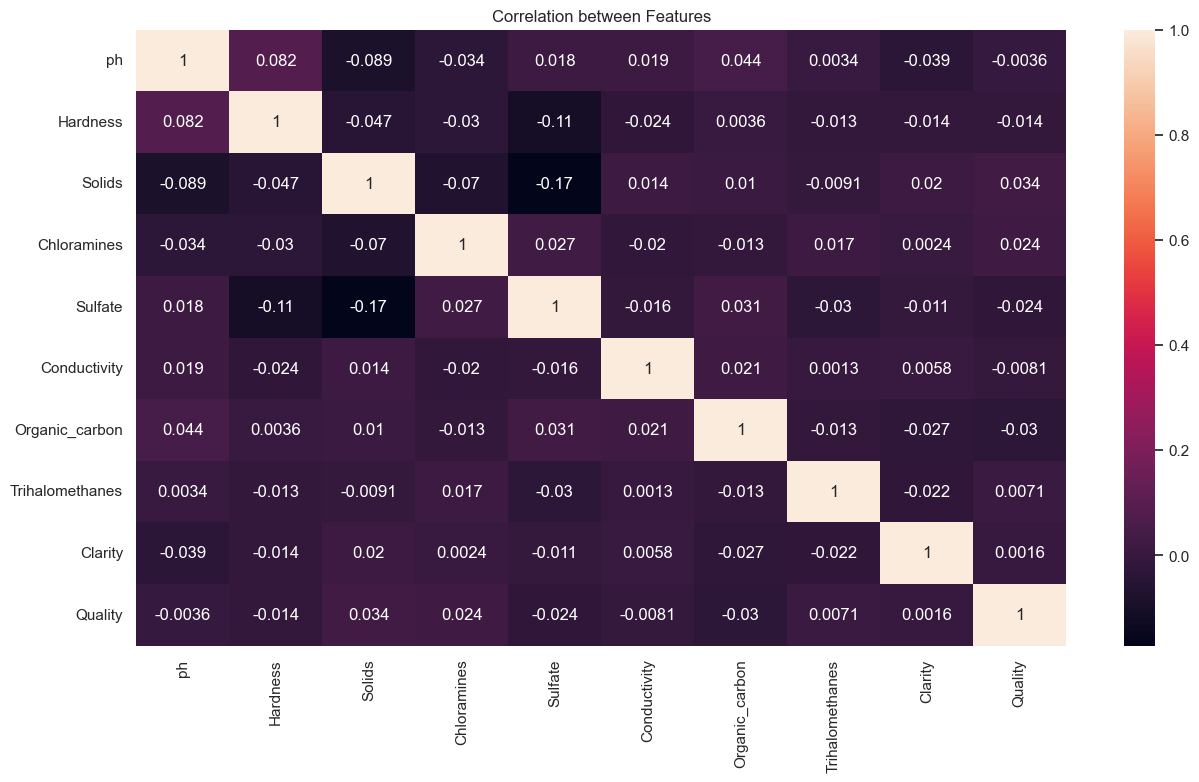

In [1135]:
df_heatmap = df_explore
plt.figure(figsize=(15, 8))
sns.heatmap(df_heatmap.corr(), annot=True).set(title="Correlation between Features")
plt.show()

<u>Observation</u>
<ul>
    <li>From the heatmap, we can conclude that there is very less correlation between any of the variables as correlation value for all are close to 0 with the highest value being 0.082 between ph and hardness while the lowest value is -0.17 for sulfate and solids.</li>
</ul>

<hr></hr>

# Data Preparation
<hr>

Grouping data into Target and Features

In [1136]:

X, y = df.drop(['Quality'], axis=1), df['Quality']


### Spliting Dataset into train and test data
In order to evaluate our model after training it, we wil need a testing set that it has not seen. Therefore, we will split our data set into train and test set by 80-20, we also set stratify=y to ensure that the distribution of classes in y is the same as overall to prevent imbalanced distribuition and a biased model.

In [1137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_training = X_train.copy()

### Data preprocessing
Things to do according to our EDA:
<ul>
    <li>Handle missing data</li>
    <li>Feature Engineer</li>
    <li>Deal with imbalanced distribution of target feature</li>
    <li>Scaling our data</li>
</ul>

<hr>

### Imputing missing data<br>
As addressed earlier in our EDA, there are missing values that needs to be handled.

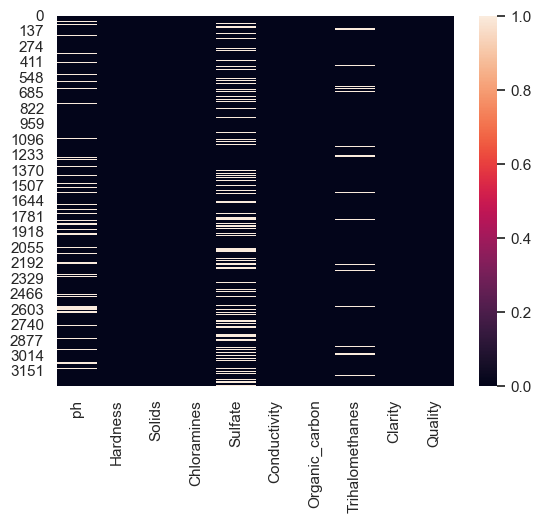

In [1138]:
sns.heatmap(df.isna())
plt.show()

We can see that there are many missing data which we addressed earlier on, so now we will have to deal with it.
There are several ways to go about dealing with missing data:

<ol>
    <li>Dropping rows or columns with missing values</li>
    <li>Fowards/Backward fill</li>
    <li>Simple imputer using average(mean, mode or median)</li>
    <li>KNN/Iterative Imputer</li>
</ol>

Since our dataset is small we will be using the KNN imputer which is a quick and effective

In [1139]:
# select columns that need to be imputed
cols = ['ph', 'Sulfate', 'Trihalomethanes']

# init the imputer
imputer = KNNImputer()

# impute the copy of training set to check if imputer is working
X_training.loc[:,cols] = imputer.fit_transform(X_training[cols])
X_test.loc[:,cols] = imputer.fit_transform(X_test[cols])

In [1140]:
# Check if there is still anymore missing value
X_training.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Clarity            0
dtype: int64

<hr>

### Creating new columns for our data

After doing some research online, I found that there is a linear relationship between solids and conductivity based on the formula:
$$ \text{TDS (mg/L)} = k_e \times \text{EC (μS/cm)} \$$

TDS = Solids, CE = Conductivity, and k = constant of proportionality.<br><br>

I also found a safety guideline for ph, according to WHO the drinkability of water is between the range of 6.5-8.5.

Therefore, we will be creating 2 new features from existing features, k_constant and ph_drinkable, in order to help train our model better.


In [1218]:
def k_constant(df):
    df["k_constant"] = pd.to_numeric(df['Solids']/df['Conductivity'])
    return df

def ph_drinkable(df):
    df['ph_drinkable'] = df['ph'].apply(lambda x: 1 if x >= 6.5 and x <=8.5 else 0)
    return df

def createCols(df):
    return ph_drinkable(k_constant(df))

X_training = createCols(X_training)
X_training

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,k_constant,ph_drinkable
2214,7.822492,208.636720,22308.82173,5.850328,408.123254,502.789396,16.135732,60.393982,3.835332,44.370112,1
1634,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,42.393514,0
2605,8.445219,228.522860,28966.56933,6.179855,349.481827,361.705354,14.554220,60.612230,4.400706,80.083330,1
114,6.745307,218.424637,21871.83870,7.165509,342.568702,373.050102,16.826619,74.086080,3.902353,58.629762,1
129,6.506488,202.285938,17087.07690,6.201983,326.662368,481.771934,16.535186,46.205748,3.548776,35.467149,1
...,...,...,...,...,...,...,...,...,...,...,...
101,7.348845,223.264940,11519.04653,8.889559,323.233881,494.158434,18.145374,73.715522,4.880875,23.310432,1
1734,3.928556,191.665998,17328.16146,7.692417,306.479558,406.085614,9.578602,45.480738,5.060836,42.671202,0
461,7.163999,203.781598,34226.07213,9.412035,320.258917,415.577513,16.221044,90.184208,3.354322,82.357854,1
2242,6.645657,170.269715,23432.10973,7.066565,298.884033,513.364946,20.264678,78.900888,4.170658,45.644156,1


<hr>

### Balancing our target distribution

In our EDA we also found that our target variable has unbalanced distribution as there is about 1.5 times more Quality 0 water compared to Quality 1 Water, so we will have to deal with it by resampling our data.

There are several ways to resample the data:
<ol>
    <li>Random Under-Sampling</li>
    <li>Random Over-Sampling</li>
    <li>Random Combined-Sampling</li>
    <li>SMOTE</li>
</ol>

Since we have are dealing with a data set with about 3000, we will be using SMOTE(Synthetic Minority Oversampling Technique) as it increase the number of instance in the minority class(Potable water) using synthetic data from the dataset.



In [1142]:
resample = SMOTE(random_state=69)
X_resampled, y_resampled = resample.fit_resample(X_training, y_train)

In [1143]:
print("Before: ",X_training.shape)
print("After: ",X_resampled.shape)

Before:  (2620, 11)
After:  (3196, 11)


In [1144]:
# From this we can see that number of datapoints for target value has increased
print("Before: ", y_train.shape)
print("After: ",y_resampled.shape)

Before:  (2620,)
After:  (3196,)


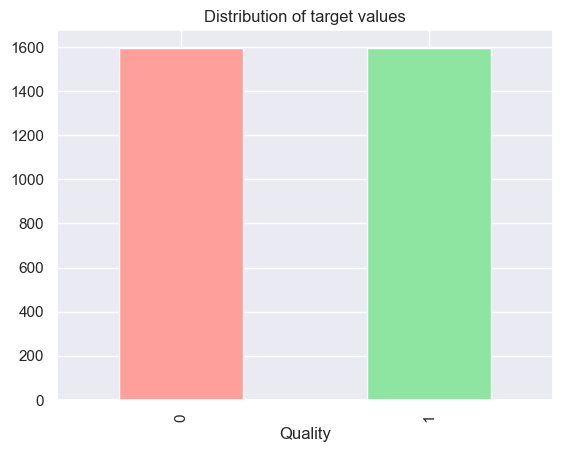

In [1145]:
bar_resampled_values = y_resampled.value_counts()
bar_resampled_values.plot(kind="bar", title="Distribution of target values", color = ['r', 'g'])
plt.show()

Summary:
By using SMOTE, we are able to populate the minority target value by producing synthetic data through nearest neighbors in the training data so that we can have an equal distrubution in target value to reduce biasness and overfitting.  


<hr>

### Standardization
There are several ways we can Standardize our data such as using:
<ol>
    <li>Standard Scaler</li>
    <li>Robust Scaler</li>
</ol>

Standard scaler which scales the data such that the mean = 0 and standard deviation = 1.<br>
It divides each value by the standard deviation of the feature and subtract the mean of the feature from each feature:

$$\ X_{\text{scaled}} = \frac{X - \mu}{\sigma} \$$

Meanwhile, Robust Scaler removes the median and scales the data according to the Inter Quartile Range which is between 25% and 75%.<br>
It uses IQR and median rather than mean and standard deviation:
$$\ X_{\text{scaled}} = \frac{X - Q_1}{Q_3 - Q_1} \$$
<br>
Since we have finding out during EDA that we need to consider that we are dealing with multiple outliers, we have to take into consideration that the outliers would have a large affect on the standard deviation of the data. Hence, we will use Robust Scaler which is more suitable as it is less influenced by outliers since it uses the IQR.



In [1146]:
col = list(X_training.columns)

scale = RobustScaler()

X_scaled = X_resampled.copy()
X_scaled[col] = scale.fit_transform(X_scaled[col])
X_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,k_constant,ph_drinkable
0,0.447274,0.301922,0.118191,-0.660058,1.837078,0.681319,0.444930,-0.302080,-0.129600,0.118191,1.0
1,-0.602367,0.782994,-0.674297,0.693246,1.449245,-1.038699,-1.635023,-1.296323,-0.368513,-0.674297,0.0
2,0.813446,0.821927,0.684304,-0.490274,0.392405,-0.554237,0.079974,-0.290780,0.430611,0.684304,1.0
3,-0.186125,0.557867,0.081034,0.017569,0.222095,-0.454885,0.604362,0.406817,-0.063191,0.081034,1.0
4,-0.326553,0.135854,-0.325817,-0.478873,-0.169769,0.497256,0.537110,-1.036663,-0.413540,-0.325817,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3191,0.327700,1.197909,-0.086451,-0.420479,0.336497,0.200708,-0.092250,-0.561624,0.502127,-0.086451,0.0
3192,0.974774,-1.186976,0.627766,-1.787341,-2.098665,0.380820,0.218648,0.691395,-0.683318,0.627766,0.0
3193,-0.656613,-0.678310,-0.218589,-0.260707,-0.563566,-0.334338,1.011118,0.379369,0.025778,-0.218589,0.0
3194,0.789508,0.575878,0.224385,-1.058532,-0.920688,0.285790,-1.142551,-0.180061,-0.934681,0.224385,0.0


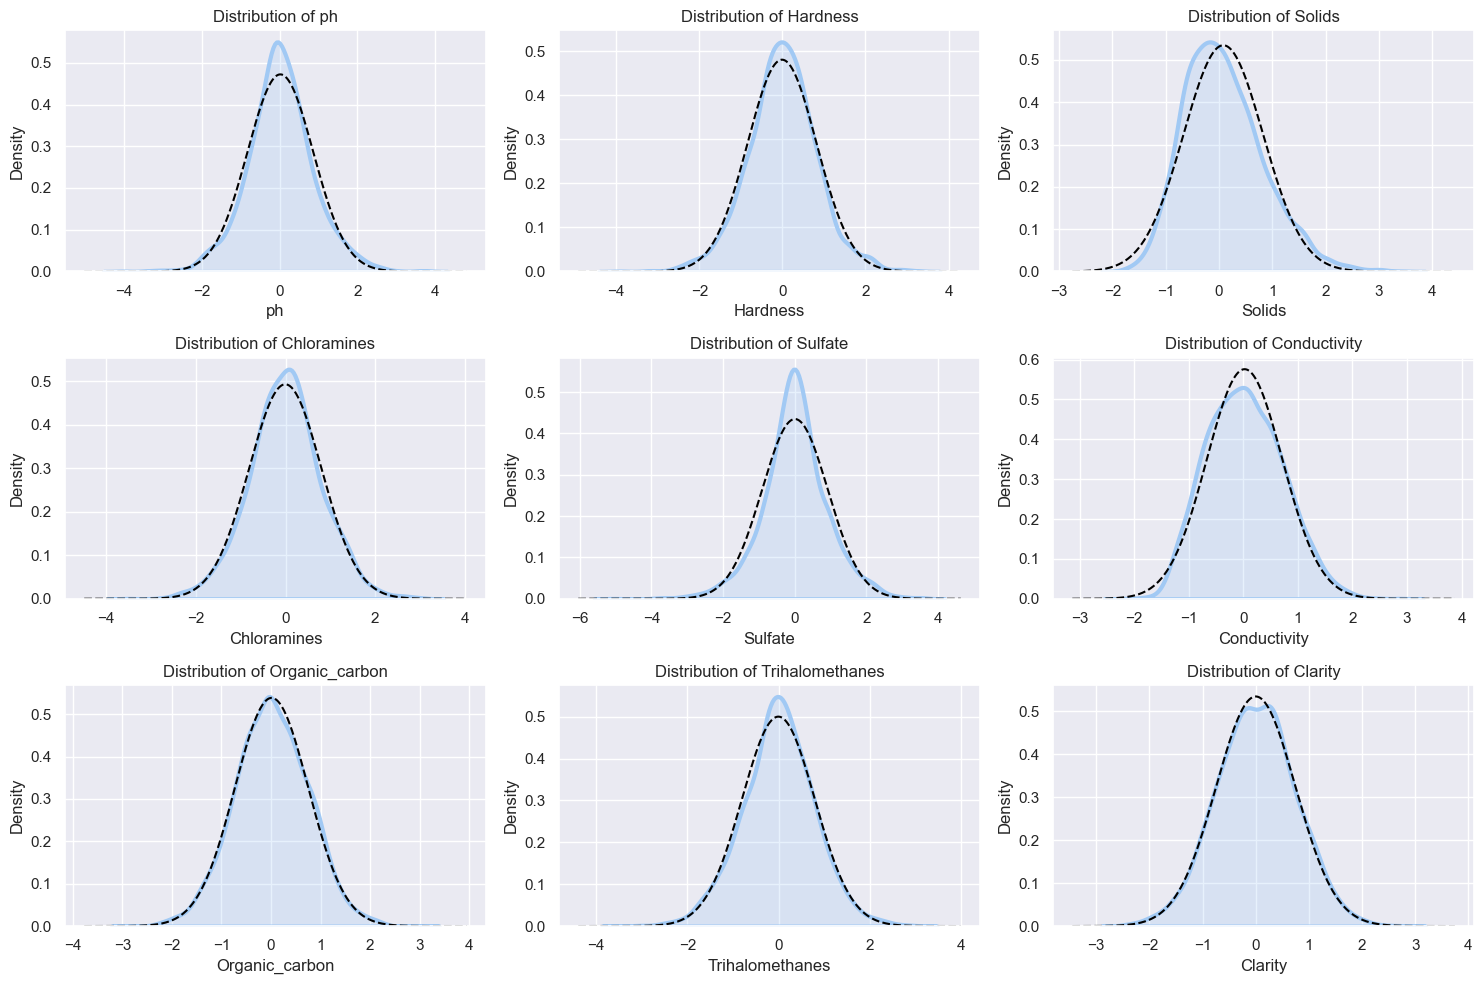

In [1147]:
df_preprocessed = pd.concat([X_scaled, y_resampled], axis=1,join='outer')

def plot_hist(features):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)

        sns.kdeplot(
            df_preprocessed[feature], lw=3, color="b", ax=axes[row, col], fill=True
        )

        # Normal distribution plot
        x_values = np.linspace(df_preprocessed[feature].min() - 1, df_preprocessed[feature].max() + 1, 1000)
        pdf_values = norm.pdf(x_values, loc=df_preprocessed[feature].mean(), scale=df_preprocessed[feature].std())
        axes[row, col].plot(x_values, pdf_values, label='Normal Distribution', color="black", linestyle='--')
        

        axes[row, col].set_title(f"Distribution of {feature}")
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

plot_hist(["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"])

<u>Observation:</u><br>
As we can see, the range of values have been standardized and most of the data takes up a range of -3 to 3. However, there are still some outliers which affects the features.

<hr>

# Model selection
<hr>


In order to find the best model, I will be training multiple model and see which yield the best results from metrics.

### Creating Pipeline
We will now create a pipeline which helps us to prevent data leakage as imputation and encoding is applied seperately to test and train dataset. It also help prevent data cotamination while allowing us to see the steps taken easier and reproduce the steps for different models.

In [1224]:
# There is conflict between imputer and our preprocesser where imputer returns a numpy array and our preprocesser 
# requires a dataframe. Hence we can write a function to convert our imputer to a dataframe

def createCols(df):
    df = pd.DataFrame(df, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity'])
    df["k_constant"] = pd.to_numeric(df['Solids']/df['Conductivity'])

    df['ph_drinkable'] = df['ph'].apply(lambda x: 1 if x >= 6.5 and x <=8.5 else 0)
    return df

features_transformer = FunctionTransformer(createCols)

steps = [
    ("impute", KNNImputer()),
    ('preprocessor', features_transformer),
    ("rescale", SMOTE(random_state=69)),
    ("standardize", RobustScaler()),
    ("model")
]

STEPS_LEN = len(steps) -1


### Scoring methods
Before creating our models we will set scoring methods, to score our models and compare the results we will be using the following common scoring methods:

<ul>
    <li><b>Accuracy</b>:<br>&emsp; Proportion of correctly classified of datapoints out of total datapoints (Good when classes are balanced)</li>
    <br><li><b>Precision</b>:<br>&emsp; Proportion of true positives out of total predicted true positives (Important when cost of false positive is high)</li>
    <br><li><b>Recall</b>:<br>&emsp; Proportion of true postivies out of the total actual postives (Important when cost of false negative is high)</li>
    <br><li><b>F1 Score</b>:<br>&emsp; Mean of precision and recall (Balance of both precision and recall)</li>
    <br><li><b>ROC_AUC(Area Under Curve)</b>:<br>&emsp; Measure area under curve, plots true positive rate against false positive rate (Good for imbalanced datasets)</li>
</ul>

We will be using StratifiedKFold to cross validate our model, it creates subsets on from the train data depending on the number of folds and cross validates the subsets with one another.

In [1235]:
scoring_methods = ["accuracy", "precision", "recall", "f1", "roc_auc"]

###  Creating a Dummy Model
The dummy model acts as a control, it is a baseline model for comparison to our other models. I will be using DummyClassifier to establish a baseline accuracy score against which is used to compare the performance of more complex models. We will set our parameter strategy to uniform, this will enable to classifier to predict classes uniformly at random regardless of the distribution of the the target. Therefore it will predict quality 1 and quality 0 with a probability of 0.5 for both classes.

In [1243]:
steps[STEPS_LEN] = ("model", DummyClassifier(strategy="uniform"))
dummy = IMBPipeline(steps=steps)
dummy.fit(X_train, y_train)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print(f"Baseline Accuracy Score :{dummy.score(X_test,y_test)}")
scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=kf,
    scoring=scoring_methods,
    n_jobs=-1,
    return_train_score=True,
)

# Concatenate along rows (axis=0) to add the mean row
dummy_model_score = pd.concat([pd.DataFrame(scores),
                               pd.DataFrame([pd.DataFrame(scores).mean()],
                                             columns=pd.DataFrame(scores).columns, index=["Mean"])]
                               )

display(dummy_model_score.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]).apply(
        lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()])
    )


Baseline Accuracy Score :0.5015243902439024


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.340587,0.091610,0.484733,0.506785,0.372093,0.396419,0.470588,0.505435,0.415584,0.444338,0.500000,0.500000
1,0.341572,0.078383,0.511450,0.503817,0.402985,0.391869,0.529412,0.492391,0.457627,0.436416,0.500000,0.500000
2,0.329074,0.101789,0.507634,0.494911,0.395349,0.379769,0.500000,0.465217,0.441558,0.418173,0.500000,0.500000
3,0.353069,0.100019,0.480916,0.511450,0.380282,0.401024,0.529412,0.510870,0.442623,0.449331,0.500000,0.500000
4,0.327890,0.091765,0.500000,0.508482,0.389313,0.397950,0.500000,0.506522,0.437768,0.445720,0.500000,0.500000
5,0.337581,0.098787,0.496183,0.498304,0.372881,0.387894,0.431373,0.494565,0.400000,0.434783,0.500000,0.500000
6,0.319473,0.086766,0.511450,0.504665,0.409722,0.389286,0.578431,0.473913,0.479675,0.427451,0.500000,0.500000
7,0.323468,0.095593,0.496183,0.489822,0.380952,0.385239,0.470588,0.516304,0.421053,0.441245,0.500000,0.500000
8,0.312217,0.100591,0.500000,0.498728,0.390625,0.388465,0.485437,0.498368,0.432900,0.436606,0.500000,0.500000
9,0.317213,0.090603,0.522901,0.504665,0.411290,0.395816,0.495146,0.514690,0.449339,0.447493,0.500000,0.500000


As expected, the accuracy turns out to be around 0.5 for our dummy model and the average test_f1 turned out to be 0.43. The AUC turns out to be 0.5 for all our folds which is expected as our strategy is uniform so it randomly classifies the classes with a 0.5 probability each.

### Creating a function to plot the learning curve
In order to see how our model performs as test size varies, we can plot the learning curve to see the cross validation score compared to training score

In [1250]:
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )

    model_name = type(model[-1]).__name__
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax



In [978]:
# Initiate Classifiers with default hyper parameters
models = [
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("SVC", SVC()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("Perceptron", Perceptron()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("RidgeClassifier", RidgeClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
]

In [1255]:
def select_model(X_train, y_train, models, scoring, ax):
    # placeholder
    out = []
    # iterate through models
    for name, model in models:
        # creating temporary pipeline
        steps[STEPS_LEN] = (name, model)
        temp_pipeline = IMBPipeline(steps=steps)

        # Create learning curve for the model
        plot_learning_curve(
            temp_pipeline,
            X_train,
            y_train,
            scoring="recall",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )
        
        # cross validate
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=-1,
            verbose=1,
            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
            return_train_score=True,
        )
        # get the average score and then store in a Series
        out.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(out).sort_values(
        by=[
            "test_f1",
            "test_recall",
            "test_accuracy",
            "test_roc_auc",
        ],
        ascending=False,
    )


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out

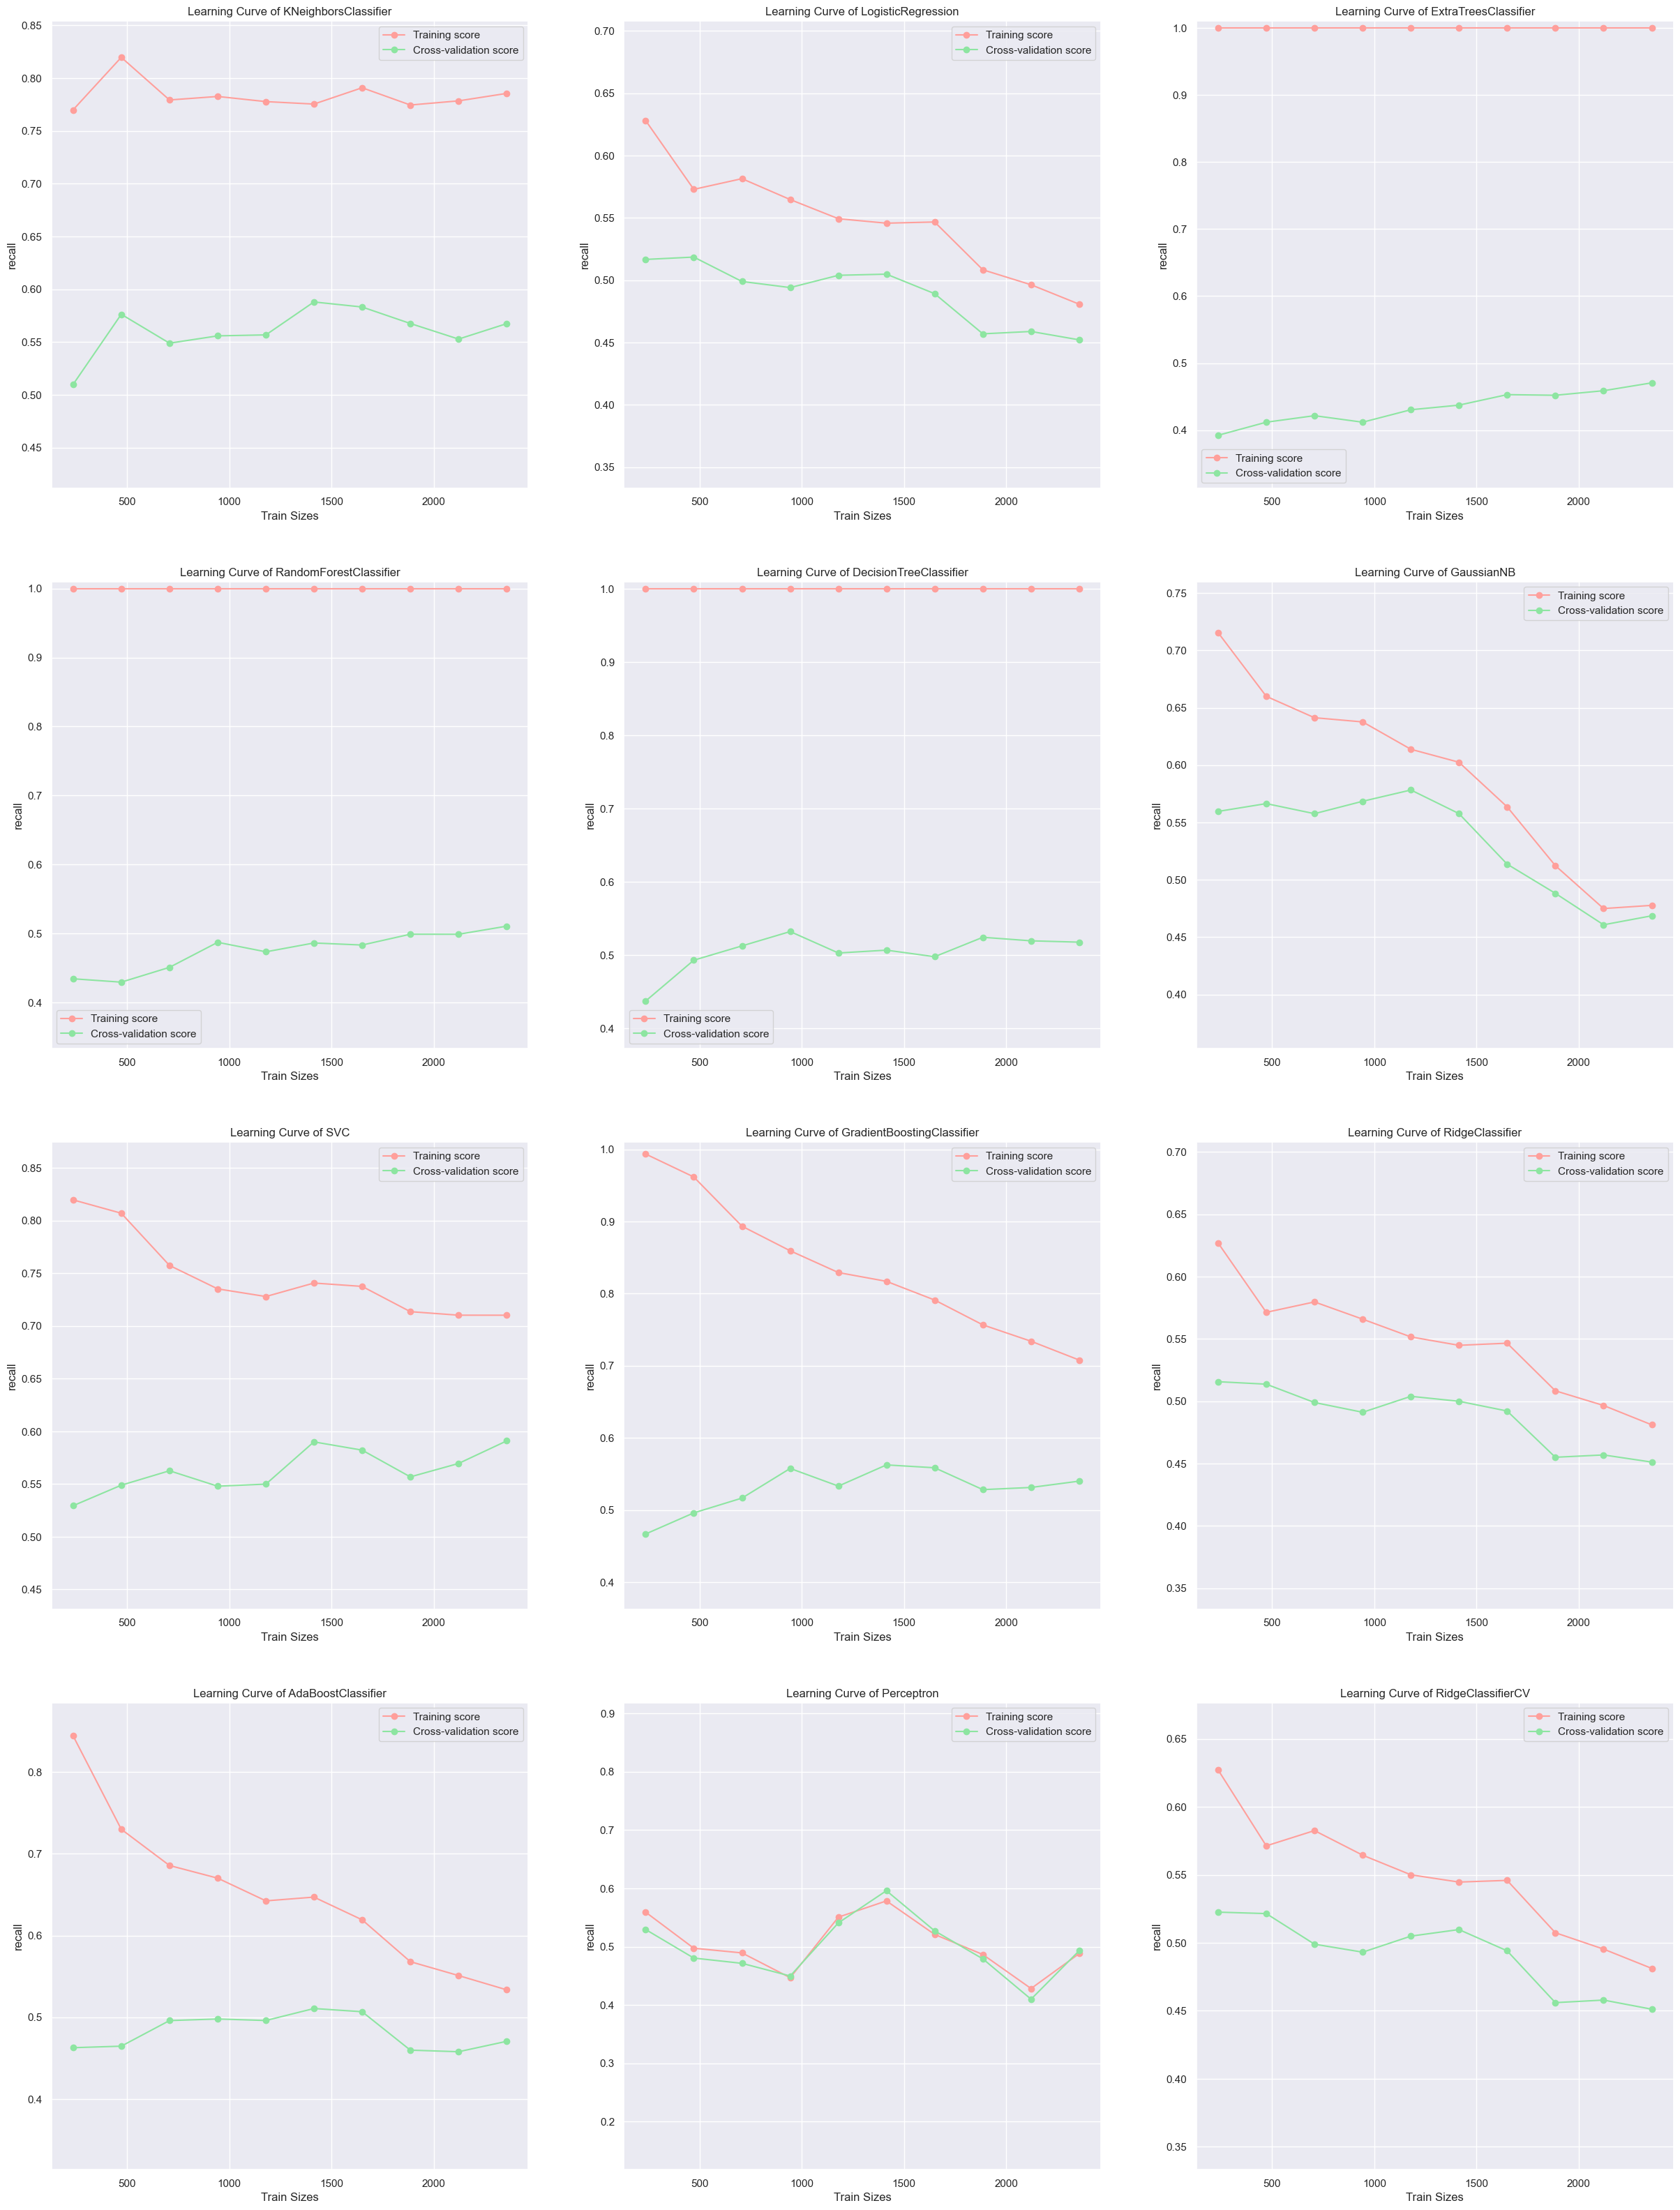

In [1258]:
# Since we are comparing 12 models
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_methods, ax)
plt.show()

In [1259]:
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
SVC,1.124857,0.349540,0.645802,0.742748,0.542509,0.658374,0.590986,0.710268,0.564579,0.682884,0.685863,0.814105
RandomForestClassifier,4.344340,0.169327,0.653435,1.000000,0.561010,1.000000,0.506825,1.000000,0.531414,1.000000,0.679024,1.000000
KNeighborsClassifier,0.440006,0.170469,0.602672,0.763656,0.493168,0.667437,0.567476,0.785605,0.526688,0.721673,0.629492,0.846851
GradientBoostingClassifier,4.707469,0.121446,0.615267,0.774470,0.506850,0.712186,0.542062,0.708526,0.522852,0.710165,0.640330,0.853899
ExtraTreesClassifier,1.624705,0.184344,0.645420,1.000000,0.554939,1.000000,0.467733,1.000000,0.506019,1.000000,0.666316,1.000000
DecisionTreeClassifier,0.599372,0.116223,0.574046,1.000000,0.459402,1.000000,0.532448,1.000000,0.492688,1.000000,0.566607,1.000000
GaussianNB,0.503940,0.141141,0.561832,0.573325,0.442074,0.455342,0.468627,0.477719,0.453976,0.466045,0.572058,0.588879
AdaBoostClassifier,1.506488,0.162044,0.542366,0.618024,0.421432,0.510337,0.470626,0.533599,0.443788,0.521427,0.540273,0.652367
Perceptron,0.493146,0.138670,0.511832,0.511238,0.402761,0.401119,0.493223,0.488248,0.427457,0.424079,0.496732,0.500668
LogisticRegression,0.476744,0.110477,0.479771,0.510390,0.364004,0.394926,0.452161,0.480764,0.402803,0.433549,0.466012,0.510406


<u>Observation</u>
As we can see from the table, there isn't a very outstanding model that performs very well in every scoring

Based on the results, we can observe our top 3 performing models are
<ol>
    <li> SVC</li>
    <li> KNeighborsCLassifier</li>
    <li> Random Forset Classifier</li>
</ol>

Baseline Dummy scoring for f1, test acc and roc: 0.43, 0.5, 0.5

While our other models performed equally or slightly better compared to our baseline model,

<u>Selecting our model</u>

Look at at our top 3 models with f1 scores of about 0.56, 0.52, 0.52 respectively, comparing this to our Dummy Model f1 score which is around 0.43, we can see that our models perfomed slightly better by 0.09-0.13. We could improve this further by hypertuning our models, but we will have to take a closer look at these models.

Overall, we can see that Random Forest Classifier stands out the most, yielding the best results for accuracy, f1 and test_roc_auc. While Gradient Boosting Classifier had the highest recall score, however it took the longest time to train. Looking at Extra Tree Classifier, it does not stand out compared to Random Forest Classifier or Gradient Boosting Classifier. Hence, we will mainly focus on Random Forest Classier as it is our best perfomer.


### Hypertuning Our Models

In order to hypertune our model we will have to first look at the possible hyperparameters that we can tune.

In [1275]:
print(list(SVC().get_params().keys()))
print(list(KNeighborsClassifier().get_params().keys()))
print(list(RandomForestClassifier().get_params().keys()))

['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose']
['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


As we can see, there are many different parameters we can tune, therefore, we will only choose the most important ones as tuning all of the parameters would take up too much time.

<u>Parameter to be tuned:</u>
<ul>
    <li>n_estimators</li>
    -Controls number of tree
    <li>max_depth</li>
    -Controls maximum depth of the each decision tree
</ul>

In [1276]:
# RFC Hypertune
param_grid = {
    'n_estimators': [10,50,100,200],
    'max_depth': [None,10,20,30]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create model based on pipeline
steps[STEPS_LEN] = (
    "hyper", RandomizedSearchCV(
        RandomForestClassifier(),
        param_grid,
        cv=kf,
        n_jobs=-1,
        verbose=1,
        scoring="f1"
    )
)

rfc_search = IMBPipeline(steps=steps)

# fit model
rfc_search.fit(X_train, y_train)

# print(svc_search.named_steps["hyper"].best_estimator_)
print(rfc_search["hyper"].best_params_)
print(rfc_search["hyper"].best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'max_depth': None}
0.7131657661545832


In [1277]:
# KNN params grid
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 10, 15, 30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5],
    'leaf_size': [20, 30, 40, 50, 75, 100],
}

# Create model based on pipeline
steps[STEPS_LEN] = (
    "hyper", RandomizedSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=kf,
        n_jobs=-1,
        verbose=1,
        scoring="f1"
    )
)

knn_search = IMBPipeline(steps=steps)

# fit model
knn_search.fit(X_train, y_train)

# print(svc_search.named_steps["hyper"].best_estimator_)
print(knn_search["hyper"].best_params_)
print(knn_search["hyper"].best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'weights': 'distance', 'p': 2, 'n_neighbors': 8, 'leaf_size': 30}
0.6901516735180655


In [1269]:
# SVC Hypertune
param_grid = {
              'C':[0.1,1, 10, 100],
              'degree' : [1,2,3,4,5,6]}


# Create model based on pipeline
steps[STEPS_LEN] = (
    "hyper", RandomizedSearchCV(
        SVC(),
        param_grid,
        cv=kf,
        n_jobs=-1,
        verbose=1,
        scoring="f1"
    )
)

svc_search = IMBPipeline(steps=steps)

# fit model
svc_search.fit(X_train, y_train)

# print(svc_search["hyper"].best_estimator_)
print(svc_search["hyper"].best_params_)
print(svc_search["hyper"].best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'degree': 1, 'C': 10}
0.705101319454739


In [1278]:
svc_model = svc_search["hyper"].best_estimator_
rfc_model = rfc_search["hyper"].best_estimator_
knn_model = knn_search["hyper"].best_estimator_

In [1290]:
steps[STEPS_LEN] = ("model", svc_model)
svc_clf = IMBPipeline(steps=steps)
svc_clf.fit(X_train, y_train)

# SVC UNTUNED
steps[STEPS_LEN] = ("model", SVC())

svc_clf_untuned = IMBPipeline(steps=steps)
svc_clf_untuned.fit(X_train, y_train)

# RFC TUNED
steps[STEPS_LEN] = ("model", rfc_model)

rfc_clf = IMBPipeline(steps=steps)
rfc_clf.fit(X_train, y_train)

# RFC UNTUNED
steps[STEPS_LEN] = ("model", RandomForestClassifier())

rfc_clf_untuned = IMBPipeline(steps=steps)
rfc_clf_untuned.fit(X_train, y_train)

# KNN TUNED
steps[STEPS_LEN] = ("model", knn_model)

knn_clf = IMBPipeline(steps=steps)
knn_clf.fit(X_train, y_train)

# KNN UNTUNED
steps[STEPS_LEN] = ("model", KNeighborsClassifier())

knn_clf_untuned = IMBPipeline(steps=steps)
knn_clf_untuned.fit(X_train, y_train)


# DUmmy
steps[STEPS_LEN] = ("model", DummyClassifier(strategy="uniform"))
dummy = IMBPipeline(steps=steps)
dummy.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()),
                ('preprocessor',
                 FunctionTransformer(func=<function createCols at 0x000001FC5DE554C0>)),
                ('rescale', SMOTE(random_state=69)),
                ('standardize', RobustScaler()),
                ('model', DummyClassifier(strategy='uniform'))])

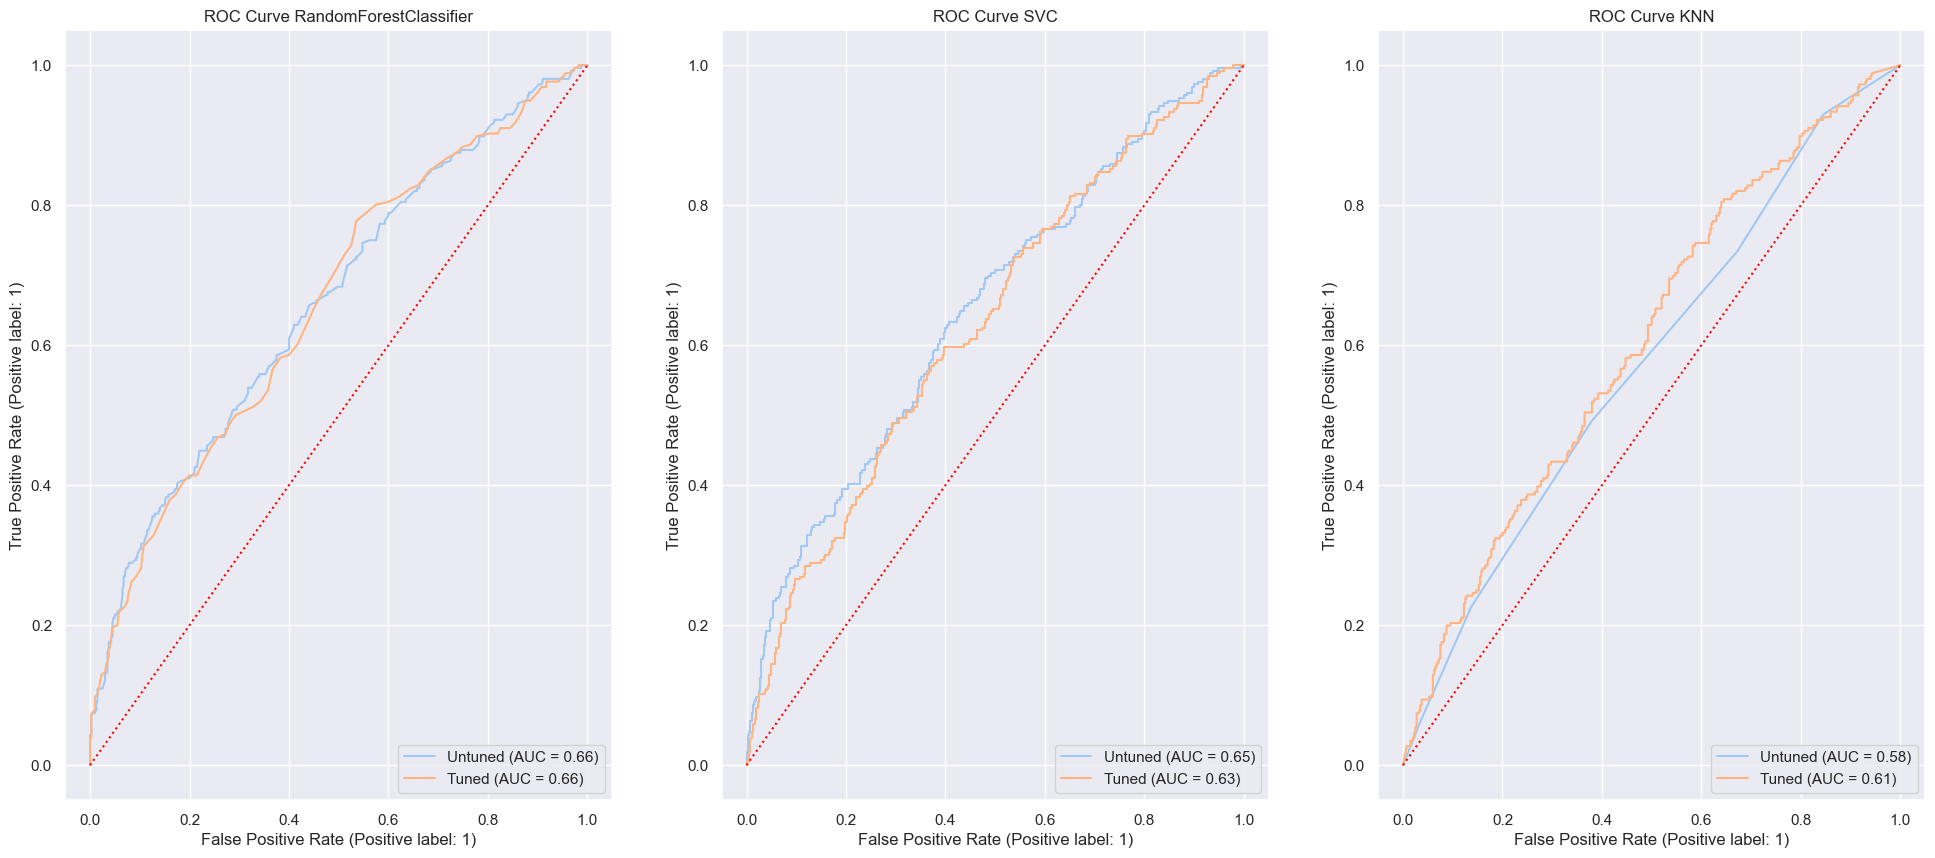

In [1286]:
fig, ax = plt.subplots(1, 3, figsize=(24, 10))
# RandomForestClassifier
RocCurveDisplay.from_estimator(rfc_clf_untuned, X_test, y_test, ax=ax[0], name="Untuned")
RocCurveDisplay.from_estimator(rfc_clf, X_test, y_test, ax=ax[0], name="Tuned")
# RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[0], name="Nth")

# # DecisionTreeClassifier
RocCurveDisplay.from_estimator(svc_clf_untuned, X_test, y_test, ax=ax[1], name="Untuned")
RocCurveDisplay.from_estimator(svc_clf, X_test, y_test, ax=ax[1], name="Tuned")

# # KNN
RocCurveDisplay.from_estimator(knn_clf_untuned, X_test, y_test, ax=ax[2], name="Untuned")
RocCurveDisplay.from_estimator(knn_clf, X_test, y_test, ax=ax[2], name="Tuned")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")
ax[2].plot(x, x, ":", color="red")

ax[0].set_title("ROC Curve RandomForestClassifier")
ax[1].set_title("ROC Curve SVC")
ax[2].set_title("ROC Curve KNN")
plt.show()

In [1295]:
rfc_y_pred = rfc_clf.predict(X_test)
svc_y_pred = svc_clf.predict(X_test)
knn_y_pred = knn_clf.predict(X_test)
dummy_y_pred = dummy.predict(X_test)

print(f"""rfc:{classification_report(y_test, rfc_y_pred, digits=3)})""")

rfc:              precision    recall  f1-score   support

           0      0.699     0.777     0.736       400
           1      0.578     0.477     0.522       256

    accuracy                          0.660       656
   macro avg      0.639     0.627     0.629       656
weighted avg      0.652     0.660     0.653       656
)


In [1297]:
print(f"""svc:{classification_report(y_test, svc_y_pred, digits=3)})""")

svc:              precision    recall  f1-score   support

           0      0.678     0.680     0.679       400
           1      0.498     0.496     0.497       256

    accuracy                          0.608       656
   macro avg      0.588     0.588     0.588       656
weighted avg      0.608     0.608     0.608       656
)


In [1298]:
print(f"""knn:{classification_report(y_test, knn_y_pred, digits=3)})""")

knn:              precision    recall  f1-score   support

           0      0.658     0.640     0.649       400
           1      0.461     0.480     0.470       256

    accuracy                          0.578       656
   macro avg      0.559     0.560     0.560       656
weighted avg      0.581     0.578     0.579       656
)


In [1300]:
print(f"""dummy:{classification_report(y_test, dummy_y_pred, digits=3)})""")

dummy:              precision    recall  f1-score   support

           0      0.594     0.507     0.547       400
           1      0.373     0.457     0.411       256

    accuracy                          0.488       656
   macro avg      0.483     0.482     0.479       656
weighted avg      0.507     0.488     0.494       656
)


In [1289]:
importance = pd.Series(rfc_clf[-1].feature_importances_,index=X_training.columns).sort_values(ascending=False)
print(importance)

ph                 0.125721
Sulfate            0.119742
Chloramines        0.104039
Hardness           0.100527
Solids             0.095403
Clarity            0.089643
k_constant         0.089095
Organic_carbon     0.087698
Trihalomethanes    0.087073
Conductivity       0.085606
ph_drinkable       0.015452
dtype: float64


It seems that ph_drinkable has the least feature importance therfore we will try dropping it and see whether or model performs better